# EDA-4

In [1]:
import pandas as pd
import numpy as np

from afinn import Afinn

## 1. 导入数据 

In [2]:
df=pd.read_csv("../../data/终版数据/cleaned_customer.csv")

In [3]:
df.head(2)

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,nearby_sites_rating,nearest_station_dist,nearest_site_dist,nearest_site_rating
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,...,10.0,8.0,8.0,f,2,0.02,0.995731,0.617762,4.295315,4.595264
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,...,10.0,9.0,9.0,f,1,0.30,1.269606,0.399696,2.039236,4.654423


In [4]:
comment=df[["comments"]]

In [5]:
comment.head()

,comments
0,Fran was absolutely gracious and welcoming. Ma...
1,A comfortable room in a smart condo developmen...
2,Stayed over at Sujatha's house for 3 good nigh...
3,It's been a lovely stay at Sujatha's. The room...
4,"We had a great experience. A nice place, an am..."


## 2. 处理特征 

### 2.1 comments特征 

#### 删除空值的样本

In [6]:
comment.isnull().value_counts()

comments
False       155078
True           172
dtype: int64

直接将空的评论的样本直接删除

In [7]:
comment=comment.dropna(subset=["comments"])

In [8]:
comment.isnull().value_counts()

comments
False       155078
dtype: int64

### 2.2 sentiment_score特征 

利用AFINN基于每一条comment生成review scores

In [9]:
afinn = Afinn()

In [10]:
comment["sentiment_score"]=comment.comments.apply(lambda x: afinn.score(x))

In [11]:
comment.head(3)

,comments,sentiment_score
0,Fran was absolutely gracious and welcoming. Ma...,10.0
1,A comfortable room in a smart condo developmen...,10.0
2,Stayed over at Sujatha's house for 3 good nigh...,27.0


### 2.3  polarity 特征

表示评论的特征是positive还是negative

In [12]:
def polar(x):
    if x>0:
        return 1
    elif x<0:
        return 0
    else:
        return -1

In [13]:
comment["polarity"]=comment.sentiment_score.apply(lambda x:polar(x))

In [14]:
comment.head(5)

,comments,sentiment_score,polarity
0,Fran was absolutely gracious and welcoming. Ma...,10.0,1
1,A comfortable room in a smart condo developmen...,10.0,1
2,Stayed over at Sujatha's house for 3 good nigh...,27.0,1
3,It's been a lovely stay at Sujatha's. The room...,11.0,1
4,"We had a great experience. A nice place, an am...",11.0,1


### 3. 探索问题：开始画云

In [15]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
from wordcloud import WordCloud, STOPWORDS

#### 提取postive的评论 

In [17]:
positive_comments=comment[comment.polarity==1]

In [23]:
positive_comments.head()

,comments,sentiment_score,polarity
0,Fran was absolutely gracious and welcoming. Ma...,10.0,1
1,A comfortable room in a smart condo developmen...,10.0,1
2,Stayed over at Sujatha's house for 3 good nigh...,27.0,1
3,It's been a lovely stay at Sujatha's. The room...,11.0,1
4,"We had a great experience. A nice place, an am...",11.0,1


#### 提取negative的评论

In [24]:
negative_comments=comment[comment.polarity==0]

In [25]:
negative_comments.head()

,comments,sentiment_score,polarity
17,Wir hatten ein paar tolle Tage bei Sujatha. Si...,-12.0,0
49,not bad,-3.0,0
76,It was unfortunate that Belinda was not arroun...,-3.0,0
92,"It's terrible.The house near the airport ,but ...",-2.0,0
454,"Bianca hat ein sehr schönes, individuell einge...",-6.0,0


#### 读取背景图片

In [26]:
background = np.array(Image.open("../Pictures/Singapore.png"))

#### 设置stopwords 

In [48]:
stopwords = set(STOPWORDS)
stopwords.update({"room","place","Singapore","apartment","everything","und","de"})

#### 建立模型和训练模型 

In [49]:
from matplotlib import colors

In [52]:
wc = WordCloud(background_color="white", 
               max_words=2000, 
               mask=background,
               stopwords=stopwords, 
               contour_width=3, 
               contour_color='steelblue',
               scale=2,
               #colormap=
              )

##### positive cloud 

In [53]:
# generate word cloud
wc.generate(" ".join(positive_comments.comments.tolist()))

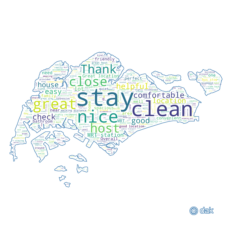

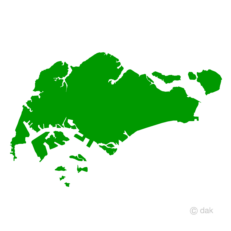

In [54]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(background, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")


wc.to_file("../Pictures/result_positive.png")

plt.show()

##### negative cloud

In [55]:
wc.generate(" ".join(negative_comments.comments.tolist()))

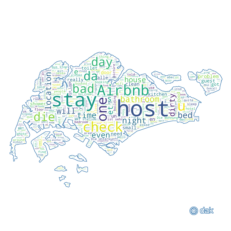

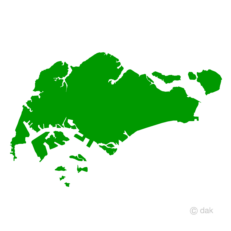

In [56]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(background, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")


wc.to_file("../Pictures/result_negative.png")

plt.show()